In [ ]:
#  Install GeoPandas Library for the Analysis
!pip3 install geopandas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [8]:
# Reading the Geo Location Data
df_geo = pd.read_csv("./csv/demo_health_facilities_geo_data.csv")
df_geo

,Facility Type,Latitude,Longitude
0,Hospital,5.593051,3.697007
1,Hospital,10.017569,9.921846
2,Hospital,7.568808,11.178651
3,Hospital,11.574567,12.594135
4,Hospital,6.093634,9.334975
...,...,...,...
762,Pharmacy,11.844224,9.831699
763,Pharmacy,8.228317,8.502529
764,Pharmacy,8.162100,4.821424
765,Pharmacy,7.568452,8.388384


In [10]:
df_geo['Facility Type'].value_counts()

Facility Type
Pharmacy                         627
Primary Care Center              118
Specialized Healthcare Center     12
Hospital                          10
Name: count, dtype: int64

Text(0, 0.5, 'Total Counts')

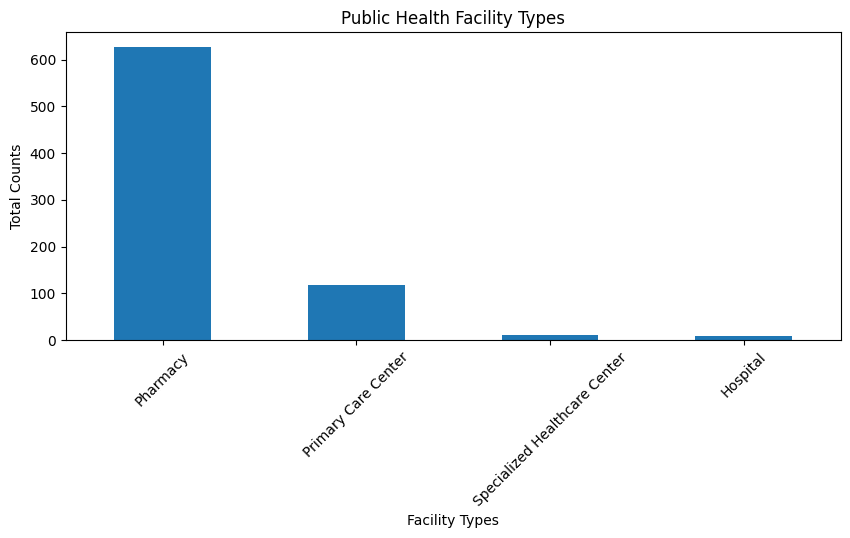

In [20]:
plt.figure(figsize=(10,4))
df_geo['Facility Type'].value_counts().plot(kind='bar')
plt.title('Public Health Facility Types')
plt.xticks(rotation=45)
plt.xlabel('Facility Types')
plt.ylabel('Total Counts')


In [22]:
gdf = gpd.GeoDataFrame(df_geo,geometry=gpd.points_from_xy(df_geo.Longitude,df_geo.Latitude))
gdf

,Facility Type,Latitude,Longitude,geometry
0,Hospital,5.593051,3.697007,POINT (3.69701 5.59305)
1,Hospital,10.017569,9.921846,POINT (9.92185 10.01757)
2,Hospital,7.568808,11.178651,POINT (11.17865 7.56881)
3,Hospital,11.574567,12.594135,POINT (12.59413 11.57457)
4,Hospital,6.093634,9.334975,POINT (9.33497 6.09363)
...,...,...,...,...
762,Pharmacy,11.844224,9.831699,POINT (9.8317 11.84422)
763,Pharmacy,8.228317,8.502529,POINT (8.50253 8.22832)
764,Pharmacy,8.162100,4.821424,POINT (4.82142 8.1621)
765,Pharmacy,7.568452,8.388384,POINT (8.38838 7.56845)


<Axes: >

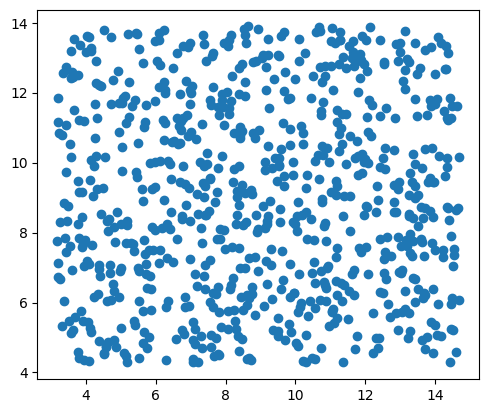

In [24]:
gdf.plot()

Text(0.5, 1.0, 'Health Facility Type')

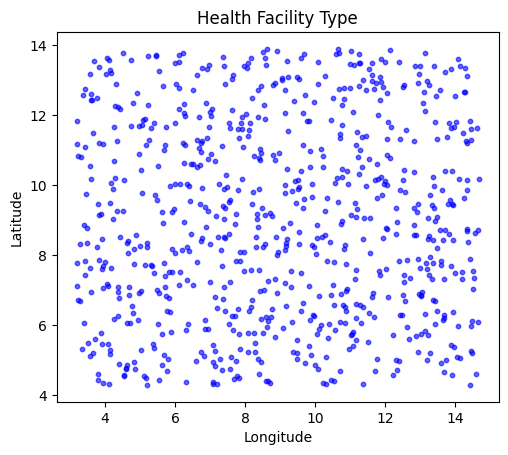

In [28]:
gdf.plot(markersize=10,color="blue",alpha=.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Health Facility Type")

In [29]:
# Creating a buffers from the 

buffers = gdf.copy()
buffers['geometry'] = gdf.buffer(0.10)

<Axes: >

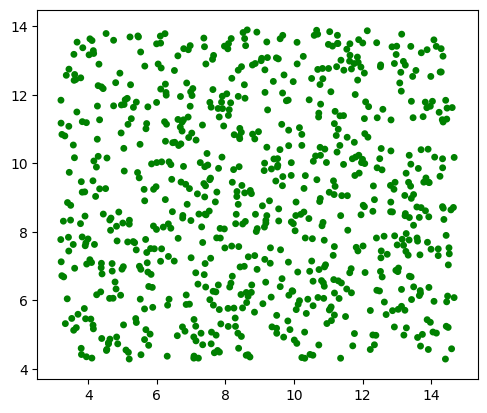

In [34]:
buffers.plot(color="green")

<Axes: >

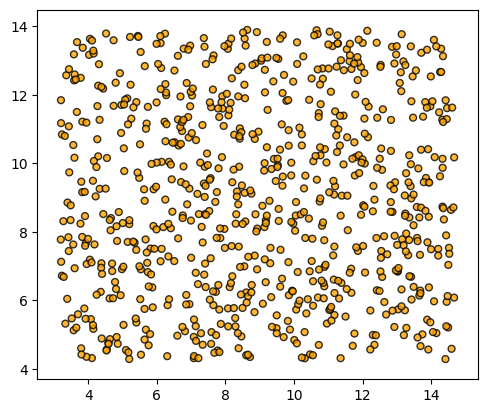

In [36]:
buffers.plot(color="orange", edgecolor="k", alpha=.8)

Text(0.5, 1.0, 'Geopoint with buffers')

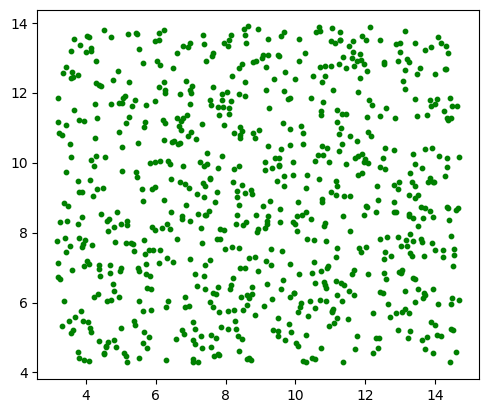

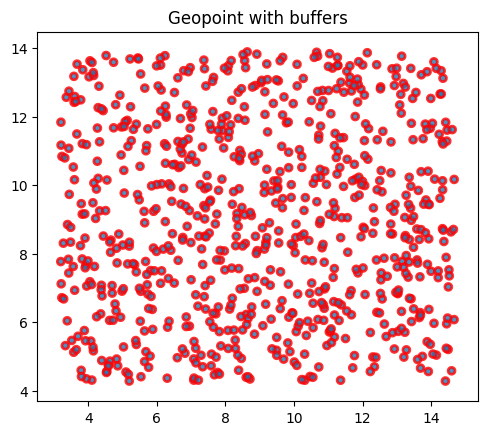

In [37]:
gdf.plot(color='green', markersize=10, label="geopoints")
buffers.plot(edgecolor="red", linewidth=2, label="BUffers",alpha=.8)
plt.title("Geopoint with buffers")

<Axes: >

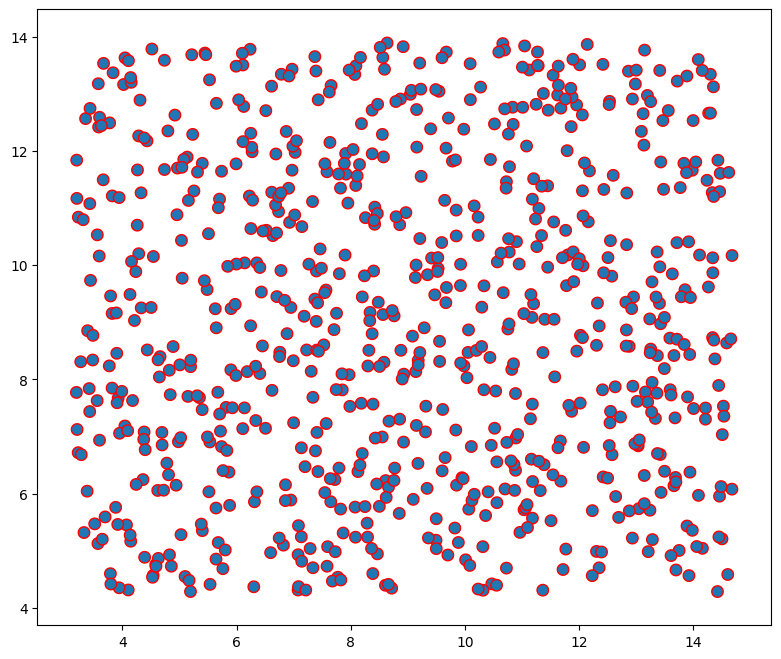

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax, color="blue",markersize=4,label="geopoints")
buffers.plot(ax=ax, edgecolor="red", linewidth=1, label="buffer")